In [65]:
import pandas as pd

from openscm.units import unit_registry
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
# once we have a reader/pyam as dependency, use that instead
example_df = pd.DataFrame([
    ['AIM', 'cscen', 'World', 'Emissions|N2O', 'Mt N / yr', 1.8, 15.6],
    ['AIM', 'cscen', 'World', 'Emissions|N2O|Shipping', 'Mt N / yr', 1, 6],
    ['AIM', 'cscen', 'World', 'Emissions|N2O|Solvents', 'Mt N / yr', 1.6, 3.8],
    ['AIM', 'cscen', 'World', 'Emissions|N2O|Transport', 'Mt N / yr', -0.8, 5.8],
    ['AIM', 'cscen', 'RASIA', 'Emissions|N2O', 'Mt N / yr', 0, 5.9],
    ['AIM', 'cscen', 'RASIA', 'Emissions|N2O|Solvents', 'Mt N / yr', 0.8, 2.6],
    ['AIM', 'cscen', 'RASIA', 'Emissions|N2O|Transport', 'Mt N / yr', -0.8, 3.3],
    ['AIM', 'cscen', 'REUROPE', 'Emissions|CH4', 'Mt CH4 / yr', 0.8, 3.7],
    ['AIM', 'cscen', 'REUROPE', 'Emissions|CH4|Solvents', 'Mt CH4 / yr', 0.8, 1.2],
    ['AIM', 'cscen', 'REUROPE', 'Emissions|CH4|Transport', 'Mt CH4 / yr', 0, 2.5],
    ['AIM', 'cscen', 'China', 'Emissions|HFC23', 'kt HFC23 / yr', 0.2, 1.3],
    ['AIM', 'cscen', 'China', 'Emissions|HFC23|Transport', 'kt HFC23 / yr', 0.2, 1.3],
    ['AIM', 'cscen', 'Japan', 'Emissions|HFC23', 'kt HFC23 / yr', -1, 2],
    ['AIM', 'cscen', 'Japan', 'Emissions|HFC23|Transport', 'kt HFC23 / yr', -1, 2],
    ['AIM', 'cscen', 'Germany', 'Emissions|N2O', 'Mt N / yr', 2, 3],
    ['AIM', 'cscen', 'Germany', 'Emissions|N2O|Transport', 'Mt N / yr', 2, 3],
    ['AIM', 'cscen', 'UK', 'Emissions|N2O', 'Mt N / yr', -2, -0.5],
    ['AIM', 'cscen', 'UK', 'Emissions|N2O|Transport', 'Mt N / yr', -2, -0.5],

],
    columns=['model', 'scenario', 'region', 'variable', 'unit', 2005, 2010],
)
example_df = example_df.melt(
    id_vars=list(set(example_df.columns) - set([2005, 2010])),
    value_vars=[2005, 2010], 
    var_name="year"
)

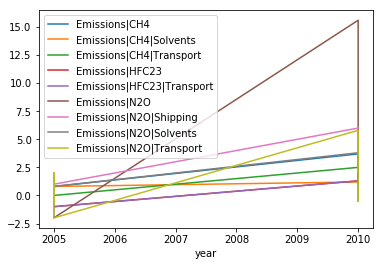

In [72]:
fig, ax = plt.subplots()
for label, df in example_df.groupby("variable"):
    df.plot(x="year", y="value", label=label, ax=ax);

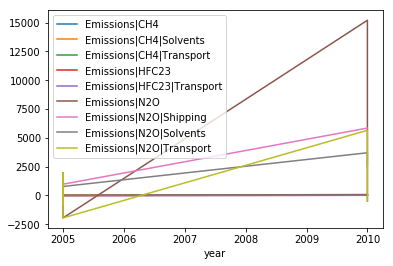

In [73]:
with unit_registry.context("SARGWP100"):
    conversion_factors = example_df["unit"].apply(lambda x: unit_registry(x.split(" ")[1]).to("CO2").magnitude)
    conversion_factors *= example_df["unit"].apply(lambda x: unit_registry(x.split(" ")[0]).to("Mt").magnitude)
#     conversion_factors = conversion_factors.apply(lambda x: x.to("Mt CO2 / yr").magnitude)
example_df["value"] *= conversion_factors
example_df["unit"] = "MtCO2/yr"

fig, ax = plt.subplots()
for label, df in example_df.groupby("variable"):
    df.plot(x="year", y="value", label=label, ax=ax);

In [74]:
example_df

,unit,region,model,scenario,variable,year,value
0,MtCO2/yr,World,AIM,cscen,Emissions|N2O,2005,1753.714286
1,MtCO2/yr,World,AIM,cscen,Emissions|N2O|Shipping,2005,974.285714
2,MtCO2/yr,World,AIM,cscen,Emissions|N2O|Solvents,2005,1558.857143
3,MtCO2/yr,World,AIM,cscen,Emissions|N2O|Transport,2005,-779.428571
4,MtCO2/yr,RASIA,AIM,cscen,Emissions|N2O,2005,0.000000
5,MtCO2/yr,RASIA,AIM,cscen,Emissions|N2O|Solvents,2005,779.428571
6,MtCO2/yr,RASIA,AIM,cscen,Emissions|N2O|Transport,2005,-779.428571
7,MtCO2/yr,REUROPE,AIM,cscen,Emissions|CH4,2005,16.800000
8,MtCO2/yr,REUROPE,AIM,cscen,Emissions|CH4|Solvents,2005,16.800000
9,MtCO2/yr,REUROPE,AIM,cscen,Emissions|CH4|Transport,2005,0.000000
